# Hands-on Lab: Setting up a Staging Area

### Practice with the above file

# Populating a Data Warehouse

* Create service credentials in IBM DB2 cloud instance.

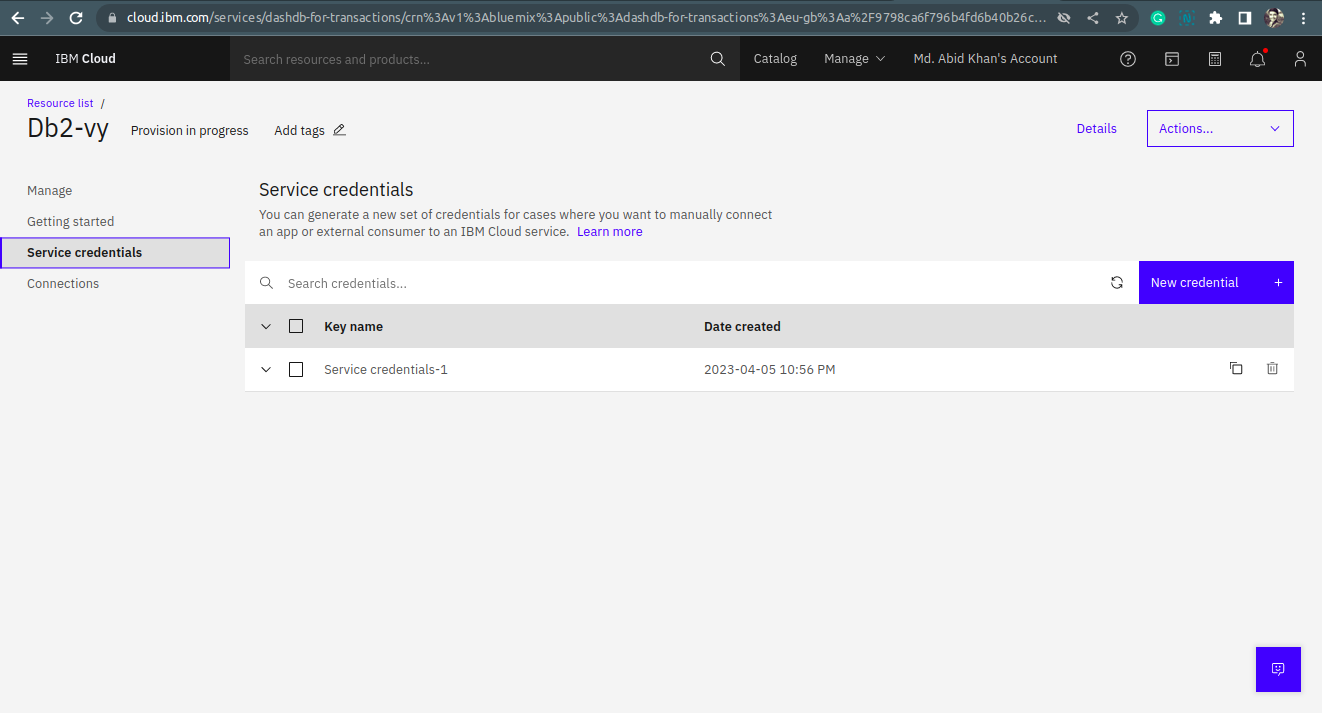

* Commands in terminal to access and import in the above DB2 instance